In [1]:
%load_ext autoreload
%autoreload 2

# Training the Left-Right Hand Classifier Model

## 1. Creating Datasets

In [2]:
from model.left_hand import FreiHANDLeftHandDataset, FreiHANDLeftHandDataLoader
from settings import LEFT_RIGHT_MODEL_CONFIG

Loading Training set.

In [3]:
train_dataset = FreiHANDLeftHandDataset(set_type="train")
train_dataset

FreiHAND [Train - 26000 items]

In [4]:
train_dataloader = FreiHANDLeftHandDataLoader(
    dataset=train_dataset,
    batch_size=LEFT_RIGHT_MODEL_CONFIG["batch_size"],
    shuffle=True,
    drop_last=True,
    num_workers=2
)
train_dataloader

FreiHANDDataLoader [Train - Batch size: 48 - Length: 541]

Loading Validation set.

In [5]:
val_dataset = FreiHANDLeftHandDataset(set_type="val")
val_dataset

FreiHAND [Val - 5000 items]

In [6]:
val_dataloader = FreiHANDLeftHandDataLoader(
    dataset=val_dataset,
    batch_size=LEFT_RIGHT_MODEL_CONFIG["batch_size"],
    shuffle=True,
    drop_last=True,
    num_workers=2
)
val_dataloader

FreiHANDDataLoader [Val - Batch size: 48 - Length: 104]

## 2. Model and Loss

Generating the NeuralNetwork.

In [7]:
from model.left_hand import AlexNet

In [8]:
model = AlexNet(num_classes=2)
model

AlexNet(
  (layer1): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer4): Sequential(
    (0): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  

Generating the Loss

In [9]:
from torch import nn

loss = nn.CrossEntropyLoss()
loss

CrossEntropyLoss()

## 3. Training

Creating configuration file:

In [10]:
config = {
    "device": LEFT_RIGHT_MODEL_CONFIG["device"],
    "epochs": LEFT_RIGHT_MODEL_CONFIG["epochs"],
    "batches_per_epoch": LEFT_RIGHT_MODEL_CONFIG["batches_per_epoch"],
    "batches_per_epoch_val": LEFT_RIGHT_MODEL_CONFIG["batches_per_epoch_val"],
    "learning_rate": LEFT_RIGHT_MODEL_CONFIG["learning_rate"],
    "model_name": LEFT_RIGHT_MODEL_CONFIG["model_name"],
    "X_name": "image",
    "y_name": "left"
}

Generating the trainer.

In [11]:
from model.trainer import Trainer

trainer = Trainer(
    model=model,
    criterion=loss,
    train_dataloader=train_dataloader,
    val_dataloader=val_dataloader,
    config=config
)
trainer

Trainer [Epochs: 1000; Batches per Epoch: 50; Batches per Epoch Validation: 20]

Evaluating the model.

In [12]:
%%time
model = trainer.train()

INFO: Epoch: 1/1000, Train Loss=2.3996675879, Val Loss=0.6729619418
INFO: Epoch: 2/1000, Train Loss=0.6880068604, Val Loss=0.6519532573
INFO: Epoch: 3/1000, Train Loss=0.6536425375, Val Loss=0.6560593389
INFO: Epoch: 4/1000, Train Loss=0.6102549743, Val Loss=0.571775865
INFO: Epoch: 5/1000, Train Loss=0.5620342996, Val Loss=0.5350460623
INFO: Epoch: 6/1000, Train Loss=0.5478327461, Val Loss=0.5688828173
INFO: Epoch: 7/1000, Train Loss=0.5465753248, Val Loss=0.6019038246
INFO: Epoch: 8/1000, Train Loss=0.496782785, Val Loss=0.4717835003
INFO: Epoch: 9/1000, Train Loss=0.5029690938, Val Loss=0.4473042843
INFO: Epoch: 10/1000, Train Loss=0.4507197866, Val Loss=0.4353349436
INFO: Epoch: 11/1000, Train Loss=0.4375605948, Val Loss=0.5387552664
INFO: Epoch: 12/1000, Train Loss=0.4144499635, Val Loss=0.5587852455
INFO: Epoch: 13/1000, Train Loss=0.4066334384, Val Loss=0.3398662706
INFO: Epoch: 14/1000, Train Loss=0.3983090348, Val Loss=0.3977177597
INFO: Epoch: 15/1000, Train Loss=0.393044877,

Plot Training and Validation loss among epochs.Model

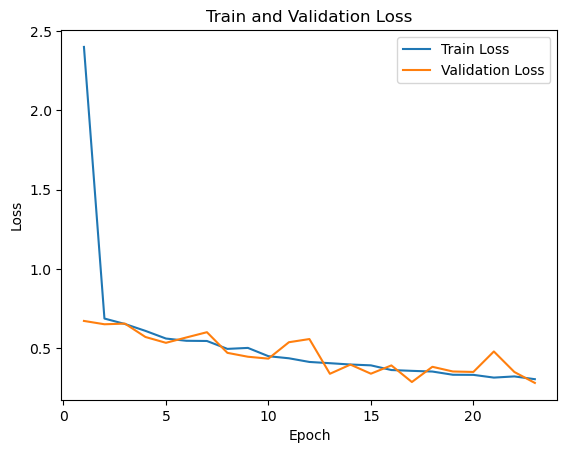

In [13]:
trainer.plot_loss()